In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset 

df = pd.read_csv("..\Telecom Churn Analysis\Telco Customer Records.csv")

# Display first few rows of the data
print("first few rows:")
print(df.head())

# describe the objects in the data
df. info()

# Check for the total rows and columns
print("total rows and columns:")
df.shape


<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_18268\1264262138.py:8: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("..\Telecom Churn Analysis\Telco Customer Records.csv")


first few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

(7043, 21)

In [5]:
#Check for missing values before cleaning
print("Missing values in columns:")
print(df.isnull().sum())

#Check for duplicates 
print("Total number of duplicates:")
print(df.duplicated().sum())


Missing values in columns:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Total number of duplicates:
0


In [6]:
#Data formatting 

#Change total charges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Map SeniorCitizen from 0/1 to No/Yes
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Replace 'No internet service' with 'No internet' in InternetService
df['InternetService'] = df['InternetService'].replace('No internet service', 'No internet')

# Rename 'Month-to-month' contract to 'Monthly'
df['Contract'] = df['Contract'].replace('Month-to-month', 'Monthly')

# Check for missing values after data formatting
print("Missing values in columns:")
print(df.isnull().sum())


Missing values in columns:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Removing duplicates
df.drop_duplicates()

# Fill missing TotalCharges with 0 if tenure == 0 (customers basically no usage yet)
df.loc[(df['TotalCharges'].isna()) & (df['tenure'] == 0), 'TotalCharges'] = 0

print("Missing values in Total Charges:")
print(df['TotalCharges'].isnull().sum())


Missing values in Total Charges:
0


In [10]:
# check cleaned data shape
print('total rows and columns: ')
print(df.shape)

#save cleaned data for analysis 

df.to_csv('cleaned telco customer record.csv', index = False)

total rows and columns: 
(7043, 21)


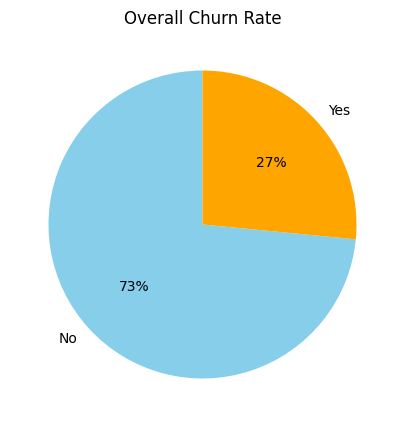

In [11]:
# Count churn values
churn_counts = df['Churn'].value_counts()

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(
    churn_counts, 
    labels=churn_counts.index, 
    autopct=lambda p: f'{p:.0f}%',  # No decimals
    startangle=90, 
    colors=['skyblue', 'orange']
)
plt.title("Overall Churn Rate")
plt.show()


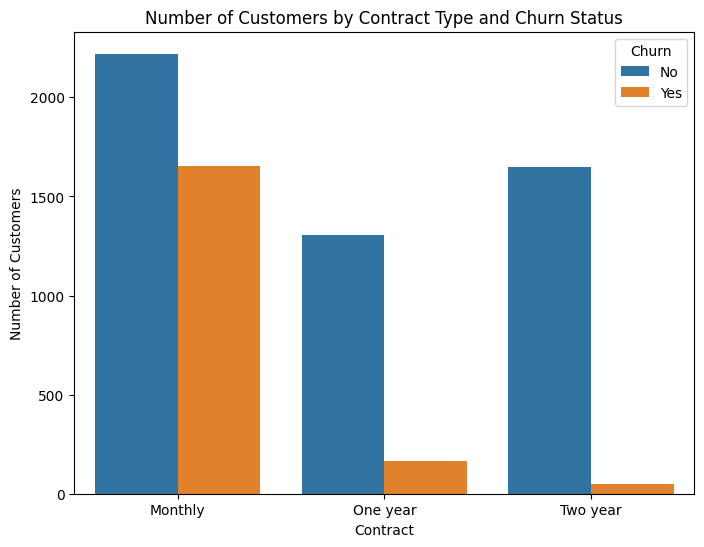

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Number of Customers by Contract Type and Churn Status')
plt.ylabel('Number of Customers')
plt.show()


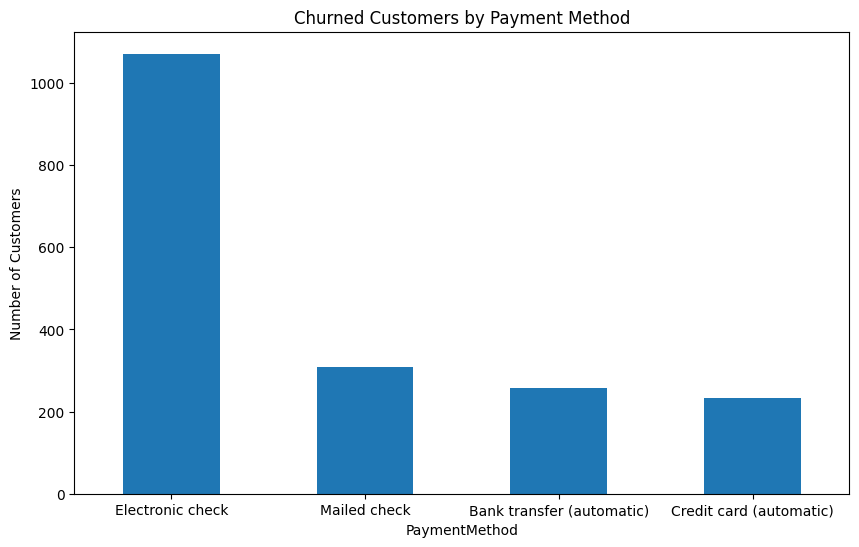

In [33]:
# Bar chart for churned customers by payment method
plt.figure(figsize=(10,6))
churned = df[df['Churn'] == 'Yes']
payment_counts = churned['PaymentMethod'].value_counts()
payment_counts.plot(kind='bar')
plt.title('Churned Customers by Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

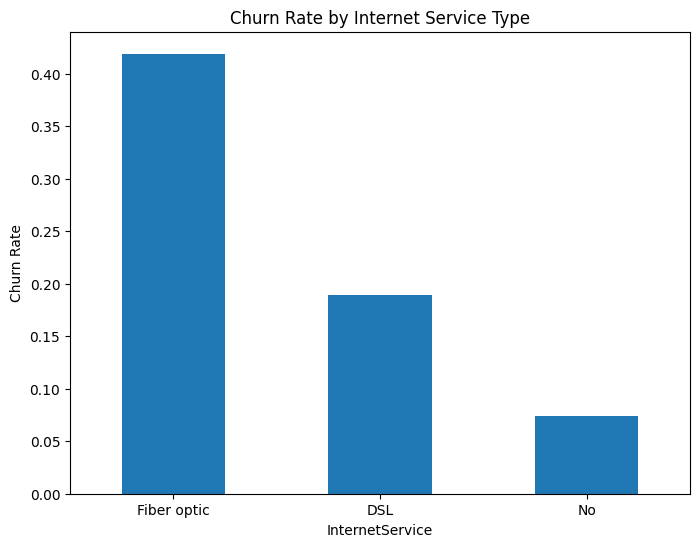

In [35]:
## Bar chart for churn rate by internet service
internet_rate = churned['InternetService'].value_counts() / df['InternetService'].value_counts()

plt.figure(figsize=(8,6))
internet_rate.plot(kind='bar')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_18268\2931865748.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_counts = df.groupby(['Tenure(group)', 'Churn']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

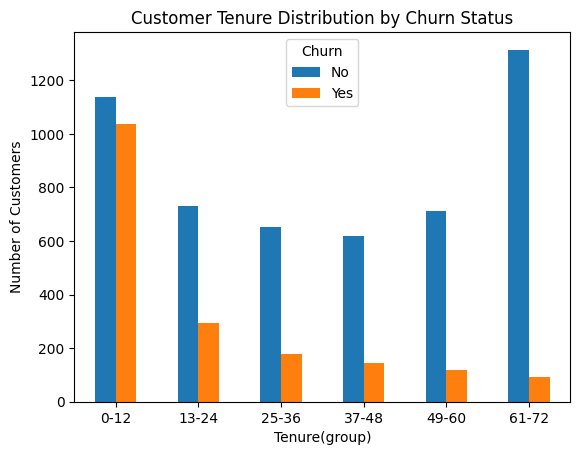

In [43]:
# Group by tenure group and churn
# Create tenure groups (bins)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['Tenure(group)'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Count customers in each tenure group by churn status
tenure_counts = df.groupby(['Tenure(group)', 'Churn']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
tenure_counts.plot(kind='bar')
plt.title('Customer Tenure Distribution by Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


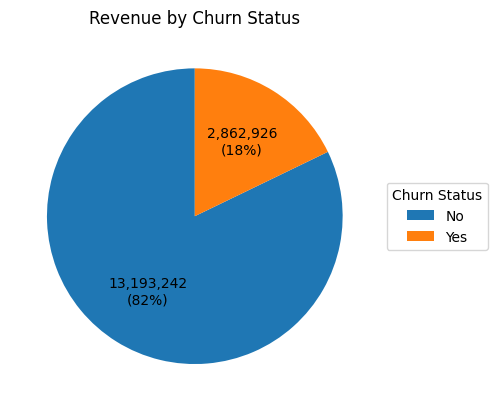

In [48]:
# Group revenue by churn status
revenue_by_churn = df.groupby('Churn')['TotalCharges'].sum()

# Pie chart
plt.pie(
    revenue_by_churn,
    autopct=lambda p: f"{int(p*revenue_by_churn.sum()/100):,}\n({p:.0f}%)",
    startangle=90
)

# Move legend outside
plt.legend(
    revenue_by_churn.index, 
    title="Churn Status", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Revenue by Churn Status')
plt.show()




In [49]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Convert Churn to numeric for correlation
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 1. Numeric correlation
print("Numeric correlation with churn:")
print(df.corr(numeric_only=True)['Churn_num'].sort_values(ascending=False).round(2))

# 2. Cramer's V for categorical correlation
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    return np.sqrt((chi2 / n) / (min(table.shape)-1))

print("\nCategorical correlation with churn:")
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        print(f"{col}: {cramers_v(df[col], df['Churn']):.2f}")


Numeric correlation with churn:
Churn_num         1.00
MonthlyCharges    0.19
TotalCharges     -0.20
tenure           -0.35
Name: Churn_num, dtype: float64

Categorical correlation with churn:
customerID: 1.00
gender: 0.01
SeniorCitizen: 0.15
Partner: 0.15
Dependents: 0.16
PhoneService: 0.01
MultipleLines: 0.04
InternetService: 0.32
OnlineSecurity: 0.35
OnlineBackup: 0.29
DeviceProtection: 0.28
TechSupport: 0.34
StreamingTV: 0.23
StreamingMovies: 0.23
Contract: 0.41
PaperlessBilling: 0.19
PaymentMethod: 0.30
